# E-commerce — Анализ товарного ассортимента

**Заказчик** - менеджер отвечающий за актуальность товарного ассортимента

**Задача** - выделить основной и дополнительный товарные ассортименты.

**Подход 1**

Разделение товаров по особенностям продажи:
- Основным товарным ассортиментом могут считаться те товары, которые продаются сами по себе
- Дополнительным - те товары, которые продаются только вместе с другими

**Подход 2**

ABC анализ:

- Разделим товары на группы по количеству продаж и по сумме выручки.

- Получим 3 категории, которые будут занимать 80%, 15%, 5%, товарного ассортимента

- На основе этого деления мы сможем определить товары в основной и дополнительный ассортимент.

- Также сможем изучить соотношение товаров из разных групп в разных категориях

**Ход проекта**
- Подготовить данные:
    - проверить форматы
    - проверить дубликаты (явные и неявные)
    - обработать дубликаты и обосновать свое решение
    - выделить месяцы из дат в отдельную колонку
- Проведите исследовательский анализ данных:
    - изучить распределение значений (аномалии и выбросы)
    - изучить динамику продаж (по дням, часам, месяцам)
- Проанализируйте торговый ассортимент:
    - выделить товарные категории
    - анализ товарных категорий
- Сформулируйте и проверьте статистические гипотезы:
    - изучить разницу в средних чеках между категориями
    - изучить разницу в динамике продаж между разными временами года

# Описание данных:

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

# Загрузка и предобработка данных

In [93]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 1000)
pd.set_option('display.expand_frame_repr', False)

# отключаем warnings
pd.options.mode.chained_assignment = None  # default='warn'

# убираю scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# библиотеки для визуализации
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind
from scipy import stats as st

import os

In [94]:
# загрузка данных
if os.path.exists(r'C:\Users\Roma\Desktop\projects\e_commerce_product_analysis\ecommerce_dataset.csv'):
    df = pd.read_csv(r'C:\Users\Roma\Desktop\projects\e_commerce_product_analysis\ecommerce_dataset.csv')
elif os.path.exists(r'/datasets/ecommerce_dataset.csv'):
    df = pd.read_csv('/datasets/ecommerce_dataset.csv')
else:
    print('Ошибка в пути файла')

In [95]:
df.sample(5)

,date,customer_id,order_id,product,quantity,price
2205,2019030611,036edc2c-d0ad-4c71-99f6-226db1b883f4,70463,Салатник Luminarc ПОЭМА АНИС 12 см J1349,1,239.000
3825,2019051518,967b53b4-0c48-4f71-98e2-121a0b568424,71400,Сумка-тележка хозяйственная GIMI Argo голубая,1,1087.000
3259,2019042817,cce13789-408b-44e1-8147-3c74dc393bf1,14701,Колеус рассада однолетних цветов в кассете по 10 шт,2,210.000
447,2018102714,ae051113-e14d-4c7a-8974-444692951513,68770,"Таз пластмассовый 20,0 л пищевой (Минеральные воды), 1404045",1,277.000
3459,2019050813,d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,14735,Подвесное кашпо Калибрахоа Aloha Kona Dark Red красная объем 4 л,1,488.000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Нужно исправить формат для столбца `date`

In [97]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

Посмотрим на столбце с датами еще раз

In [98]:
df.sample(3)

,date,customer_id,order_id,product,quantity,price
3383,2019-05-02 16:00:00,760aa067-90c3-4794-b7a9-a8831197388b,14715,Цикламен комнатный D15 см H20 см белый,1,195.000
5610,2019-07-01 11:00:00,2505619e-8c79-46d9-af14-08115a00d318,71837,Стеллаж для обуви светлый TELIO-350 OPT-350S,1,1087.000
374,2018-10-23 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68726,"Штора для ванной комнаты Cannetto 240х200 см коричневая, Bacchetta, 4061",1,1199.000


Также приведем значения названий товаров к нижнему регистру

In [99]:
df['product'] = df['product'].str.lower()


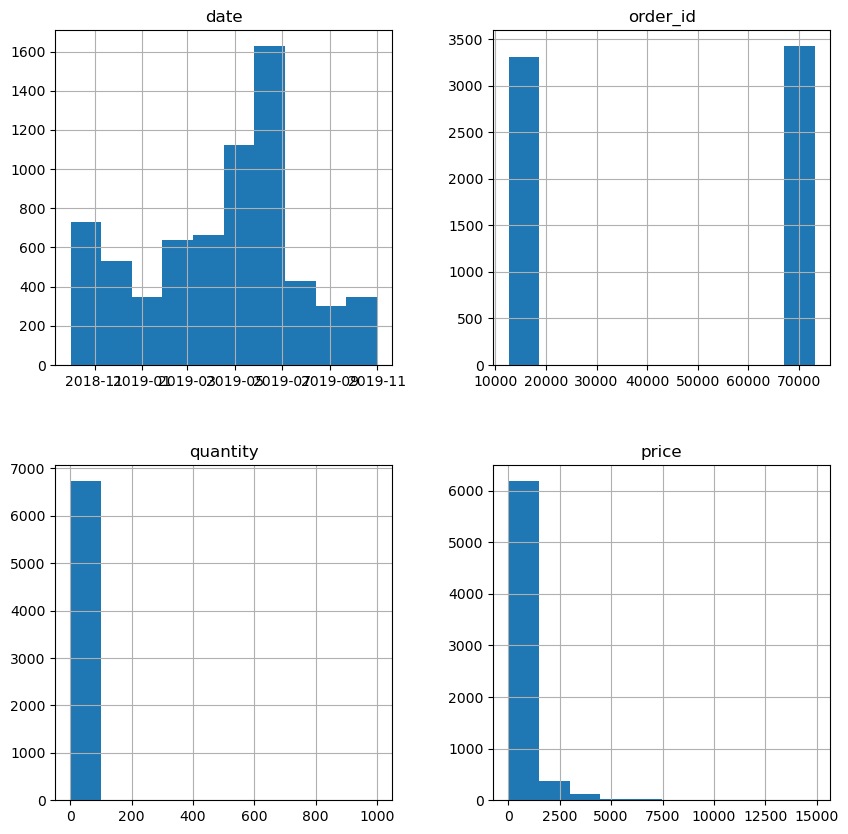

In [100]:
df.hist(figsize=(10,10))
plt.show()

Что мы видим на гистограммах:
- больше всего заказов сделали в период с марта по апрель 2019 года
- большинство товаров продаются в количестве до 100 штук
- стоимость большинства товаров лежит в промежутке до 2000 рублей

## Проверка на пропуски

In [101]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
date,0.000000
customer_id,0.000000
order_id,0.000000
product,0.000000
quantity,0.000000
price,0.000000


В датасете нет пропусков

## Проверка на дубликаты

Посмотрим на количество полных дубликатов в датасете

In [102]:
print('Количество полных дубликатов', df.duplicated().sum())
print('Доля полных дубликатов', df.duplicated().sum() / len(df))

Количество полных дубликатов 0
Доля полных дубликатов 0.0


Изучим дубликаты без учета даты

In [103]:
print('Количество полных дубликатов без учета даты', df.loc[:, df.columns != 'date'].duplicated().sum())
print('Доля полных дубликатов без учета даты', df.loc[:, df.columns != 'date'].duplicated().sum() / len(df))

Количество полных дубликатов без учета даты 1864
Доля полных дубликатов без учета даты 0.27668101528870415


Теперь мы видим, что дубликаты составляют порядка 27% значений датасета.

Можно предположить, что данные были некорректно загружены и из-за этого появились дубликаты.

Для корректного изучения данных, необходимо удалить дубликаты

In [104]:
# сохраним датасет до удаления дубликатов в новую переменную
df_with_dubs = df

In [105]:
# удалим полные дубликаты без учета даты
#drop_duplicates(subset=[тут указываешь столбцы, по которым дублируется])

df = df.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'])

In [106]:
# проверим очищенный датасет еще раз.
# вычтем из неочищенного датасета очищенные, должны получить 1864
len(df_with_dubs) - len(df)

1864

Мы удалили порядка 27% датасета. Это, несомненно, большая часть датасета, но дубликаты могут привести к сильному искажению результатов исследования.

## Добавляем дополнительные столбцы

Добавим новые столбцы для дат, а также для полной стоимости каждого товара (price * quantity)

Изучим временной промежуток

In [107]:
print('Начало изучаемого периода: ', df['date'].min())
print('Конец изучаемого периода: ', df['date'].max())

Начало изучаемого периода:  2018-10-01 00:00:00
Конец изучаемого периода:  2019-10-31 14:00:00


Так как временной промежуток больше 12 месяцев, выделим месяц и год в отдельный столбец, чтобы избежать путоницы с месяцами в разных годах

In [108]:
df['mon_year'] = df['date'].dt.strftime('%Y-%m')

Выделим дни недели

In [109]:
df['day'] = df['date'].dt.strftime('%Y-%m-%d')

In [110]:
df

,date,customer_id,order_id,product,quantity,price,mon_year,day
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000,2018-10,2018-10-01
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.000,2018-10,2018-10-01
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.000,2018-10,2018-10-01
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.000,2018-10,2018-10-01
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.000,2018-10,2018-10-01
...,...,...,...,...,...,...,...,...
6731,2019-10-31 11:00:00,f17ed857-178e-45e1-a662-0a9dd3b58c5f,73155,мимоза стыдливая d-9 см,1,329.000,2019-10,2019-10-31
6732,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"таз пластмассовый 40,0 л пищевой овальный (иж), 1404094",1,404.000,2019-10,2019-10-31
6733,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,сумка-тележка 2-х колесная gimi argo синяя,1,1087.000,2019-10,2019-10-31
6734,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"герань домашняя (пеларгония зональная) цветущая d12, h25-30, малиновая с красным, полумахровая",1,157.000,2019-10,2019-10-31


In [111]:
df['weekday'] = df['date'].dt.dayofweek + 1

Также выделим часы

In [112]:
df['hour'] = df['date'].dt.hour

Также добавим столбец с временами года

In [113]:
df['season'] = (df['date'].dt.month%12 + 3)//3

seasons = {
             1: 'Зима',
             2: 'Весна',
             3: 'Лето',
             4: 'Осень'
}

df['season_name'] = df['season'].map(seasons)

Теперь добавим столбец с полной стоимостью товара. В датасете в строке с товаром указана стоимость одной единицы (столбец price) и количество единиц (quantity).

Добавим столбец с полной стоимостью.

In [114]:
df['total_cost'] = df['price'] * df['quantity']

In [115]:
df.sample(3)

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost
3890,2019-05-17 18:00:00,b6095dc9-1580-4d1f-8ba3-a554a8dab3bd,14789,арбуз волгоградец р-9,5,38.000,2019-05,2019-05-17,5,18,2,Весна,190.000
6324,2019-09-13 14:00:00,c8d2d608-b612-4ab0-95e1-7e994e1a06ea,72621,"герань домашняя (пеларгония зональная) цветущая d12, h25-30, лососевая, махровая",1,157.000,2019-09,2019-09-13,5,14,4,Осень,157.000
6011,2019-08-01 10:00:00,bf969368-ffae-40a0-89e1-cc88f4a3100b,72168,мята махито japanosche mojito minze d-7 см h-10 см укорененный черенок,1,74.000,2019-08,2019-08-01,4,10,3,Лето,74.000


# Исследовательский анализ данных

## Изучить распределение значений (аномалии и выбросы)

Посмотрим на общее распределение значений

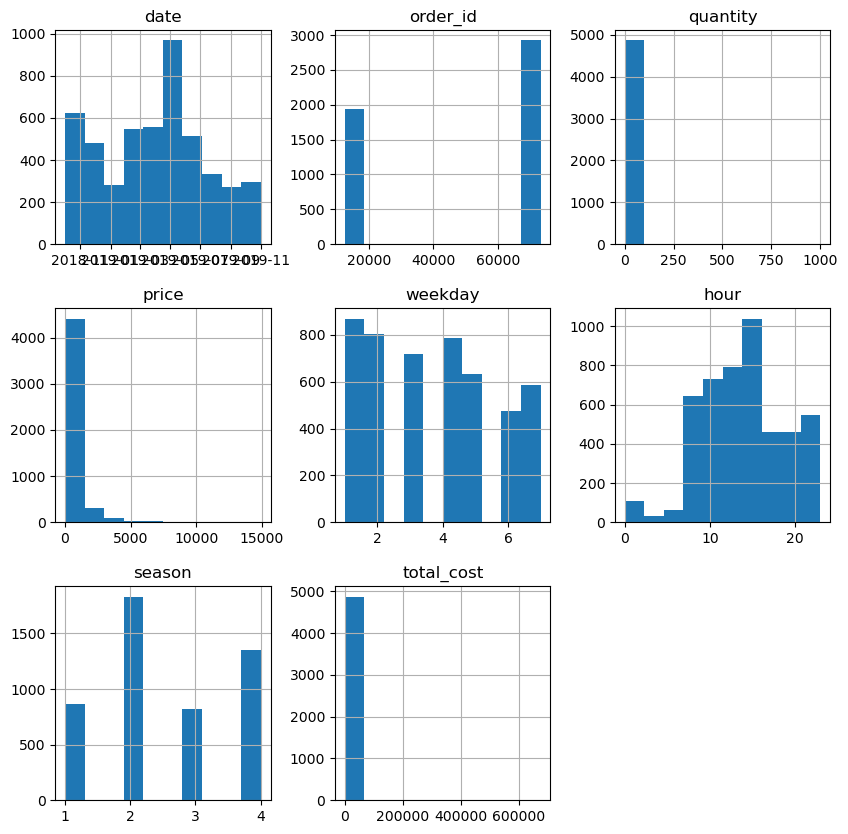

In [116]:
df.hist(figsize=(10,10))
plt.show()

Изучим значения из каждого столбца подробнее

Проанализируем customer id. Посмотрим на количество уникальных пользователей в датасете

In [117]:
print('Количество уникальных id', df['customer_id'].nunique())
print('Доля уникальных id', df['customer_id'].nunique() / len(df['customer_id']))

Количество уникальных id 2451
Доля уникальных id 0.5029755797250154


Мы видим, что уникальные customer id составляют примерно 50% от всех значений в этом столбце.

Можно предположить, что большинство пользователей совершает несколько заказов

Посмотрим на столбец `quantity`

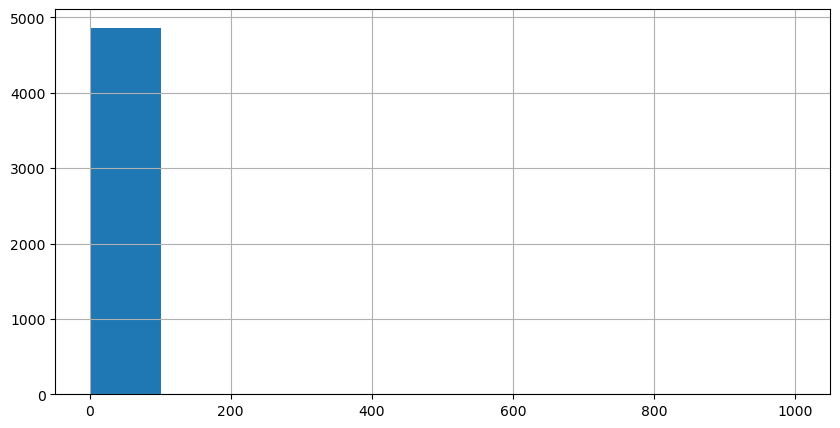

In [118]:
df['quantity'].hist(figsize=(10,5))
plt.show()

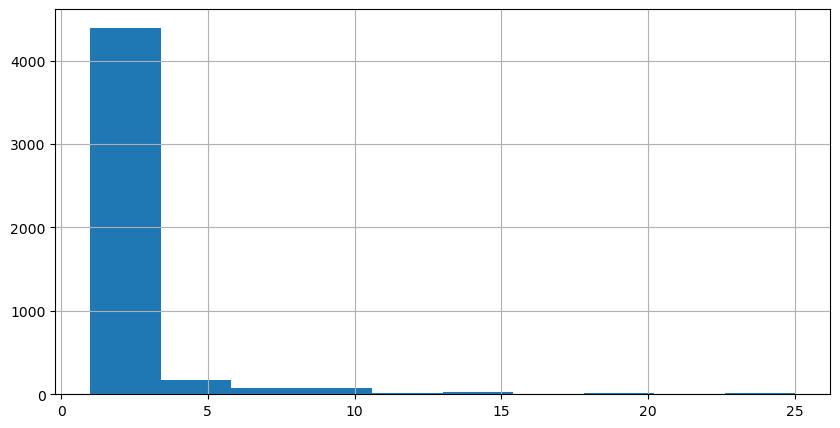

In [119]:
df['quantity'][df['quantity'] <= 25].hist(figsize=(10,5))
plt.show()

In [120]:
df['quantity'].describe()

count   4873.000
mean       2.837
std       17.607
min        1.000
25%        1.000
50%        1.000
75%        1.000
max     1000.000
Name: quantity, dtype: float64

В среднем товары берут по 2 штуки

Наибольшее значение - 1000, посмотрим, какой товар берут в таком количестве

In [121]:
df[df['quantity'] >= 1000]

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000",1000,675.000,2019-06,2019-06-18,2,15,3,Лето,675000.000


1000 вантузов - похоже на оптовый заказ, предлагаю удалить его из датафрейма

In [122]:
df = df[df['quantity'] != 1000]

## Анализ динамики продаж (по дням, часам, месяцам)

### Анализ динамики продаж по часам

In [123]:
hour_customer_id_pivot = (
    df
    .pivot_table(
        index='hour', 
        values='customer_id', 
        aggfunc='count'
    )
    .sort_values(
        by='customer_id', 
        ascending=False
    )
    .rename_axis(
        None, 
        axis=1
    ).reset_index())

display(hour_customer_id_pivot)

,hour,customer_id
0,13,438
1,11,394
2,14,383
3,12,352
4,16,349
5,10,336
6,9,320
7,15,306
8,17,298
9,19,261


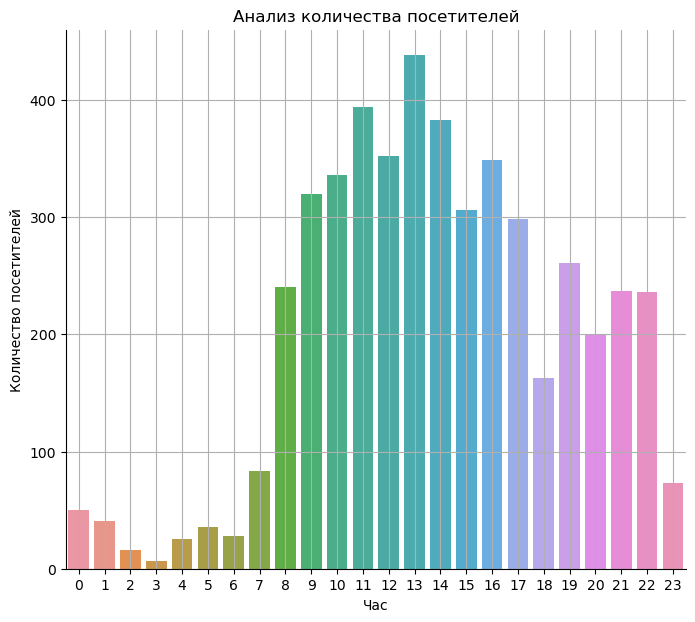

In [124]:
f, ax = plt.subplots(figsize = (8, 7))
ax = sns.barplot(x = hour_customer_id_pivot['hour'], y = 'customer_id', \
                 data = hour_customer_id_pivot.sort_values('customer_id', ascending = False), \
                 orient = 'v')
plt.title('Анализ количества посетителей')
#plt.xticks(rotation=45)
ax.set_xlabel('Час') 
ax.set_ylabel('Количество посетителей')
plt.grid()
sns.despine()
plt.show()

Наибольшее число посетителей приходится на промежуток с 9 утра по 16 часов дня.

до 8 утра сайт заказы почти не совершаются

### Анализ динамики продаж по дням недели

In [125]:
weekday_customer_id_pivot = (
    df
    .pivot_table(
        index='weekday', 
        values='customer_id', 
        aggfunc='count'
    )
    .sort_values(
        by='customer_id', 
        ascending=False
    )
    .rename_axis(
        None, 
        axis=1
    ).reset_index())

display(weekday_customer_id_pivot)

,weekday,customer_id
0,1,870
1,2,805
2,4,786
3,3,717
4,5,633
5,7,588
6,6,473


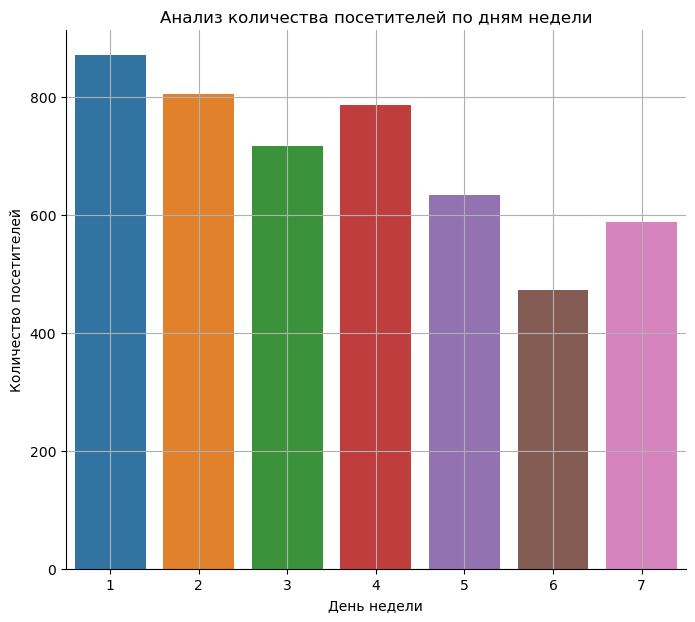

In [126]:
f, ax = plt.subplots(figsize = (8, 7))
ax = sns.barplot(x = weekday_customer_id_pivot['weekday'], y = 'customer_id', \
                 data = weekday_customer_id_pivot.sort_values('customer_id', ascending = False), \
                 orient = 'v')
plt.title('Анализ количества посетителей по дням недели')
#plt.xticks(rotation=45)
ax.set_xlabel('День недели') 
ax.set_ylabel('Количество посетителей')
plt.grid()
sns.despine()
plt.show()

Больше всего посетителей приходится на:
- понедельник
- вторник
- четверг

Меньше всего посетителей в субботу.

### Анализ динамики продаж по месяцам

In [127]:
month_customer_id_pivot = (
    df
    .pivot_table(
        index='mon_year', 
        values='customer_id', 
        aggfunc='nunique'
    )
    .sort_values(
        by='mon_year', 
        ascending=True
    )
    .rename_axis(
        None, 
        axis=1
    ).reset_index())

display(month_customer_id_pivot)

,mon_year,customer_id
0,2018-10,181
1,2018-11,178
2,2018-12,238
3,2019-01,152
4,2019-02,248
5,2019-03,237
6,2019-04,239
7,2019-05,173
8,2019-06,155
9,2019-07,186


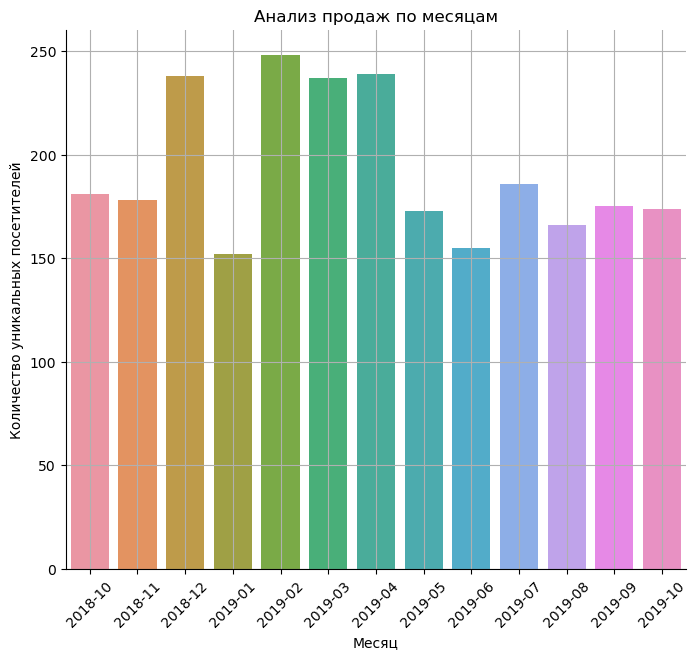

In [128]:
f, ax = plt.subplots(figsize = (8, 7))
ax = sns.barplot(x = month_customer_id_pivot['mon_year'], y = 'customer_id', \
                 data = month_customer_id_pivot.sort_values('mon_year', ascending = True), \
                 orient = 'v')
plt.title('Анализ продаж по месяцам')
plt.xticks(rotation=45)
ax.set_xlabel('Месяц') 
ax.set_ylabel('Количество уникальных посетителей')
plt.grid()
sns.despine()
plt.show()

Больше всего уникальных посетителей было в декабре 2018, феврале 2019 и апреле 2019.

А теперь посмотрим на суммарную выручку в разрезе месяцев

In [129]:
month_price_pivot = (
    df
    .pivot_table(
        index='mon_year', 
        values='total_cost', 
        aggfunc='sum'
    )
    .sort_values(
        by='mon_year', 
        ascending=True
    )
    .rename_axis(
        None, 
        axis=1
    ).reset_index())

display(month_price_pivot)

,mon_year,total_cost
0,2018-10,351910.000
1,2018-11,359348.000
2,2018-12,357044.000
3,2019-01,235671.000
4,2019-02,308055.000
5,2019-03,256348.000
6,2019-04,318171.000
7,2019-05,242375.000
8,2019-06,231270.000
9,2019-07,235410.000


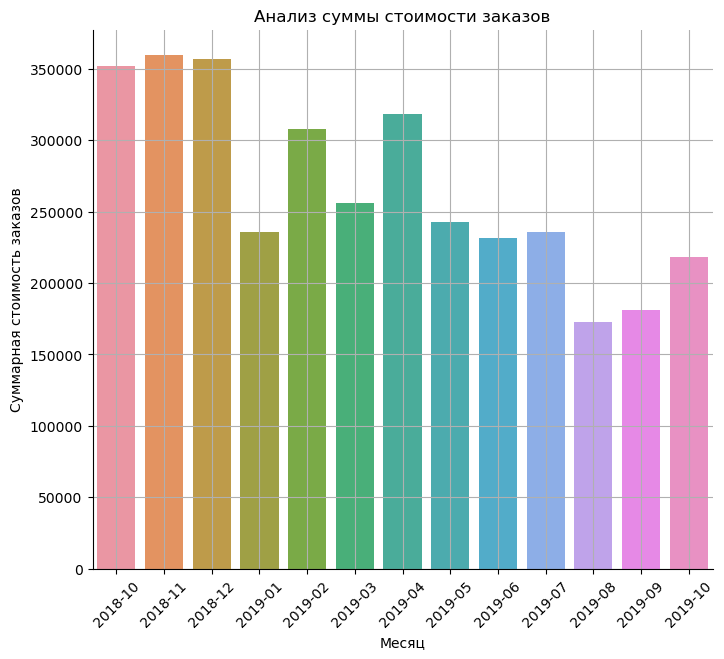

In [130]:
f, ax = plt.subplots(figsize = (8, 7))
ax = sns.barplot(x = month_price_pivot['mon_year'], y = 'total_cost', \
                 data = month_price_pivot.sort_values('mon_year', ascending = True), \
                 orient = 'v')
plt.title('Анализ суммы стоимости заказов')
plt.xticks(rotation=45)
ax.set_xlabel('Месяц') 
ax.set_ylabel('Суммарная стоимость заказов')
plt.grid()
sns.despine()
plt.show()

График показывает картину, аналогичную предыдущему. Мы видим спад в суммарной стоимости заказов

### Анализ динамики продаж по временам года

Посмотрим на продажи по временам года

In [131]:
df.head(2)

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000,2018-10,2018-10-01,1,0,4,Осень,142.000
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.000,2018-10,2018-10-01,1,0,4,Осень,194.000


In [132]:
season_price_pivot = (
    df
    .pivot_table(
        index='season_name', 
        values='total_cost', 
        aggfunc='sum'
    )
    .sort_values(
        by='total_cost', 
        ascending=False
    )
    .rename_axis(
        None, 
        axis=1
    ).reset_index())

display(season_price_pivot)

,season_name,total_cost
0,Осень,1110367.000
1,Зима,900770.000
2,Весна,816894.000
3,Лето,639123.000


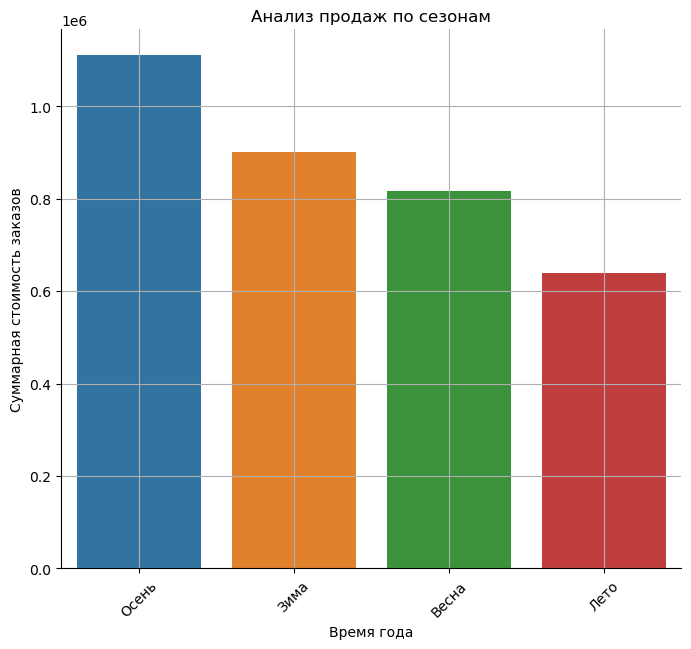

In [133]:
f, ax = plt.subplots(figsize = (8, 7))
ax = sns.barplot(x = season_price_pivot['season_name'], y = 'total_cost', \
                 data = season_price_pivot.sort_values('total_cost', ascending = False), \
                 orient = 'v')
plt.title('Анализ продаж по сезонам')
plt.xticks(rotation=45)
ax.set_xlabel('Время года') 
ax.set_ylabel('Суммарная стоимость заказов')
plt.grid()
sns.despine()
plt.show()

Больше всего покупателя тратят осенью.

# Проанализируйте товарный ассортимент

## Определение товарных категорий

В датасете указаны названия товаров, но отсутствуют категории.

Определив категории товаров, мы сможем провести более детальный анализ, изучить какие категории составляют первичный и вторичный товарный ассортимент, а также сможем узнать как меняется динамика продаж по разным категориям в изучаемый период.

Сначала изучим, как устроены названия товаров в столбце `product`.

In [134]:
df.sample(3)

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost
2769,2019-04-10 14:00:00,5cdbdfcf-e204-4836-be84-8485d4e4e100,14631,"вербена микс wicked wich смесь окрасок объем 0,5 л",1,90.000,2019-04,2019-04-10,3,14,2,Весна,90.000
573,2018-11-01 16:00:00,fb9704c7-8106-4e7a-a2a4-70a97550deb4,68822,муляж вишня 3 см 10 шт полиуретан,1,74.000,2018-11,2018-11-01,4,16,4,Осень,74.000
1799,2019-02-12 11:00:00,df0ca4d7-34b7-40ba-a3b7-f7ed82c07220,70223,эвкалипт гунни d-17 см h-60 см,1,1409.000,2019-02,2019-02-12,2,11,1,Зима,1409.000


Мы видим, что название продукта находится в самом начале строки, далее расположена дополнительная информация (размер, материал, цвет и т.д.)

Начнем с того, что выделим первые два слова из столбца `product` в новую колонку

In [135]:
df['prodct_name_split'] = df['product'].str.split(pat = ' ').str[:2]

In [136]:
df.sample(3)

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost,prodct_name_split
4596,2019-06-05 09:00:00,7d5d5657-5fdc-40d1-b7b6-bb04ede92b53,14848,роза садовая чайногибридная в горшке лимбо,1,188.000,2019-06,2019-06-05,3,9,3,Лето,188.000,"[роза, садовая]"
1928,2019-02-21 08:00:00,f15bc6a0-b20d-4aee-bdcf-080070e5b1bf,70378,тарелка обеденная стелла шоколад 25 см j1762 luminarc,5,217.000,2019-02,2019-02-21,4,8,1,Зима,1085.000,"[тарелка, обеденная]"
5368,2019-06-16 09:00:00,5699cf84-adae-4465-9831-ead94c9ecee6,71716,"коврик придверный mohawk mansonry foliage листопад 58,5х89 см 5412",1,1649.000,2019-06,2019-06-16,7,9,3,Лето,1649.000,"[коврик, придверный]"


Мы получили новый столбец `prodct_name_split`, но значения в нем находятся в списках. Исправим это

In [137]:
df['prodct_name_split'] = df['prodct_name_split'].apply(lambda x: ' '.join(x))

In [138]:
df.head(3)

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost,prodct_name_split
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000,2018-10,2018-10-01,1,0,4,Осень,142.000,комнатное растение
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.000,2018-10,2018-10-01,1,0,4,Осень,194.000,комнатное растение
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.000,2018-10,2018-10-01,1,0,4,Осень,112.000,радермахера d-12


Теперь посчитаем количество уникальных значений в столбце `prodct_name_split`

In [139]:
# строчка для вывода всех уникальных значений на экран
#list(df['prodct_name_split'].unique())

len(df['prodct_name_split'].unique())

926

Изучим полученные значения.

В целях того, чтобы тетрадку проекта было проще читать, я выведу на экран только первые 5 строчек 

In [140]:
df.groupby(['prodct_name_split'])['customer_id'].count().sort_values(ascending=False).head(5)

prodct_name_split
пеларгония зональная     375
сушилка для              272
пеларгония розебудная    249
рассада зелени           220
томата (помидор)         142
Name: customer_id, dtype: int64

Обозначим, на какие категории будем делить товары

Предлагаю разделить товары а следующие категории:

- Бытовая химия, товары для уборки
- Ванная
- Декор / текстиль
- Инструменты / товары для ремонта
- Кухня
- Товары для сада/растения
- Хранение / Мебель

Теперь сформируем списки, которые будут содержать слова из столбца `prodct_name_split`, которые позволят обозначить категорию для продуктов

In [141]:
# Бытовая химия, товары для уборки
cleaning = [
'Автоматическая щетка',
'Вантуз с', 'Вантуз черный', 'Ведро AMPARI', 'Ведро без', 'Ведро для', 'Ведро овальное', 'Ведро пластиковое', 'Ведро Полимербыт',
'Ведро резинопластиковое', 'Веник для', 'Веник сорго', 'Губка спираль', 'Ерш для', 'Ёрш для', 'Ёрш радиаторный', 'Ёрш унитазный', 'Жидкое мыло', 
'Кондиционер для', 'Мыло жидкое', 'Мыло ручной', 'Мыло-скраб с', 'Мыльница пластмассовая', 'Насадка-моп ROZENBAL', 'Насадка-отжим пластиковая',
'Настенная сушилка', 'Окномойка с', 'Ополаскиватель для', 'Отбеливатель Пероксоль', 'Отжим для', 'Пылесос DELTA', 'Средство для', 'Средство против',
'Стиральный биопорошок', 'Универсальное средство', 'Чистящий крем', 'Швабра Leifheit', 'Швабра для', 'Швабра многофункциональная,',
'Швабра многофункциональная', 'Швабра САЛЬСА', 'Швабра хозяйственная', 'Щётка для', 'Щетка палубная',
'Щетка универсальная', 'Щетка хозяйственная', 'Щетка-сметка 3-х', 'Щетка-сметка 4-х', 'Щетка-сметка с', 'Щетка-утюжок с'
]

# Ванная
bathroom =[
'Бальзам для', 'Ванна 70', 'Весы напольные', 'Дозатор для', 'Зубная паста', 'Коврик влаговпитывающий', 'Комплект махровых',
'Махровое полотенце', 'Махровый халат', 'Паста для', 'Паста зубная', 'Пена для', 'Полотенце махровое', 'Сиденье в', 'Сиденье для', 
'Таз алюминиевый,', 'Таз пластмассовый', 'Увлажняющая маска', 'Халат вафельный'
]

# Декор / текстиль
decoration = [
    'Готовая скатерть', 'Двуспальное постельное', 'Декоративная композиция', 'Декоративная коробка', 'Искусственная композиция',
'Искусственная лиана', 'Искусственный лист', 'Искусственный цветок', 'Карниз алюминиевый', 'Карниз для', 'Ковер придверный', 'Ковёр придверный',
'Коврик Bacchetta', 'Коврик Dasch', 'Коврик Sochi', 'Коврик в', 'Коврик ворсовый', 'Коврик для', 'Коврик интерьерный', 'Коврик кухонный',
'Коврик придверный,', 'Коврик придверный', 'Коврик противоскользящий', 'Коврик резиновый', 'Коврик хлопковый', 'Комплект постельного',
'Котовник Блю', 'Муляж "Райские', 'Муляж Ананас', 'Муляж Апельсин', 'Муляж Баклажан', 'Муляж Банан,', 'Муляж Банан', 'Муляж Булка',
'Муляж Виноград,', 'Муляж Виноград', 'Муляж Вишня,', 'Муляж Вишня', 'Муляж ГРАНАТ', 'Муляж Гранат', 'Муляж Груша,', 'Муляж Груша',
'Муляж Долька', 'Муляж Желудь', 'Муляж Зеленое', 'Муляж Клубника', 'Муляж Красное', 'Муляж Лайм', 'Муляж Лимон,', 'Муляж Лимон', 'Муляж Манго',
'Муляж Мандарин,', 'Муляж Мандарин', 'Муляж Морковь', 'Муляж Оранжевое', 'Муляж Перец,', 'Муляж Перец', 'Муляж Персик,', 'Муляж Персик',
'Муляж Персики', 'Муляж Томат,', 'Муляж Томат', 'Муляж Тыквы', 'Муляж Хлеб', 'Муляж ЧЕРЕШНЯ', 'Муляж Черешня', 'Муляж Чеснок', 'Муляж Яблоко,',
'Муляж Яблоко', 'Муляж ЯБЛОКО', 'Набор Vileda', 'Набор ковров', 'Набор махровых', 'Набор прецизионных', 'Наволочка Wellness', 'Наматрасник Wellness',
'Наматрацник Natures', 'Наматрицник-чехол Natures', 'Новогоднее дерево', 'Одеяло Silver', 'Одеяло Wellness', 'Основание для', 'Плед флисовый', 
'Подарочный набор', 'Подголовник Bacchetta', 'Подголовник для', 'Подкладка под', 'Пододеяльник 214х150', 'Подставка для',
'Подушка 40х40', 'Подушка декоративная', 'Покрывало KARNA', 'Покрывало жаккард', 'Покрывало стеганый', 'Покрытие для', 'Простынь вафельная', 
'Простыня двуспальная', 'Простыня на', 'Простыня сатиновая', 'Ручка мебельная', 'Ручка-скоба РС-100', 'Светильник настольный', 'Ткань для', 
'Ткань универсальная', 'Фиксатор-шар хром', 'Фоторамка Alparaisa', 'Штора для', 'Штора со', 'Штора текстильная', 'Щетка для', 'Ящик почтовый'
]

# Инструменты / товары для ремонта
tools = ['Вкладыши для', 'Завертка форточная', 'Запасная насадка', 'Защитный экран', 'Измерительный алюминиевый', 'Измерительный угольник,',
'Ковш пластмассовый', 'Кольца для', 'Комплект для', 'Лестница стремянка', 'Лестница-стремянка Dogrular', 'Лестница-стремянка Sarayli',
'Лестница-стремянка Примус', 'Многофункциональный инструмент', 'Набор для', 'Набор инструментов', 'Набор сверел', 'Насадка для', 'Насадка к',
'Насадка на', 'Ножеточка универсальная', 'Перчатки Extra', 'Перчатки Fabrikators', 'Перчатки Latex', 'Перчатки латексные', 'Перчатки резиновые',
'Пружина дверная', 'Пьезозажигалка с', 'Рассекатель пламени', 'Решетка вентиляционная', 'Ролик для', 'Сверло по', 'Сверло-фреза, 6', 'Сверло-фреза, 8',
'Скребок 44', 'Скребок для', 'Сменная насадка', 'Сменный блок', 'Сметка с', 'Совок для', 'Совок и', 'Совок металический', 'Стремянка 5', 'Стремянка 7',
'Стремянка Colombo', 'Стремянка COLOMBO', 'Стремянка DOGRULAR', 'Стремянка Eurogold', 'Стремянка FRAMAR', 'Стремянка Framar', 'Стремянка Scab',
'Стремянка алюминиевая', 'Стремянка бытовая', 'Стремянка металлическая', 'Стремянка-табурет алюминиевая', 'Стремянки Colombo', 'Стяжка оконная',
'Стяжки для', 'Тележка багажная', 'Тележка хозяйственная', 'Уголок оконный', 'Холодная сварка', 'Шило с', 'Шнур резиновый', 'Шнур хозяйственный',
'Шпагат полипропиленовый', 'Шпингалет 80', 'Штанга для', 'Штангенциркуль 150']

# Кухня
kitchen = [
'Tepмокружка AVEX', 'Блюдо Pasabahce', 'Блюдце УТРО', 'Венчик с', 'Весы настольные', 'Весы электронные', 'Вилка столовая', 'Доска разделочная',
'Ёрш бутылочный', 'Измельчитель овощей', 'Капуста цветная', 'Картофелемялка металлическая', 'Кастрюля алюминиевая', 'Кастрюля круглая', 'Кастрюля чугунная',
'Кастрюля эмалированная,', 'Кастрюля эмалированная', 'Кипятильник электрический', 'Кисточка силиконовая', 'Кофе Арабика', 'Кружка 350', 'Кружка Luminarc',
'Кружка БАМБУК', 'Кружка для', 'Кружка МАРЛИ', 'Кружка мерная', 'Кружка НОРДИК', 'Кружка О', 'Кружка прозрачная', 'Кружка с', 'Кружка ТАЧКИ', 
'Кувшин Luminarc', 'Кувшин пластмассовый', 'Кухонное полотенце', 'Кухонные ножницы', 'Ложка кухонная', 'Ложка столовая', 'Ложка чайная', 
'Лопатка Attribute', 'Лопатка c', 'Лоток KNIT', 'Лоток для', 'Мантоварка алюминиевая', 'Мантоварка-пароварка WEBBER', 'Масленка КОРОВКА', 'Мерный стакан', 
'Миксер DELTA', 'Миксер ВАСИЛИСА', 'Миксер электрический', 'Мини-сковорода Marmiton', 'Миска для', 'Миска пластмассовая', 'Миска Фазенда', 'Модульная стеклянная',
'Набор бокалов', 'Набор кружек', 'Набор кухонных', 'Набор ножей', 'Набор посуды', 'Набор стаканов', 'Набор столовых', 'Набор форм', 'Набор фужеров',
'Набор эмалированных', 'Нетканые салфетки', 'Нож для', 'Нож кухонный', 'Нож поварской', 'Нож столовый', 'Нож универсальный', 'Овощеварка алюминиевая',
'Овощечистка с', 'Отделитель косточек', 'Половник Attribute', 'Полотенце кухонное', 'Полотенце прессованное', 'Пресс для', 'Просеиватель для', 
'Противень прямоугольный', 'Разделочная доска', 'Рукав для', 'Рыбочистка металлическая,', 'Рыбочистка с', 'Салатник Luminarc', 'Салатник АМОРИ', 
'Салатник АСПЕН', 'Салатник ВОЛАРЭ', 'Салатник КАРИН', 'Салатник КОЛОРАМА', 'Салатник РАПСОДИ', 'Салатник РОМАНТИК', 'Салатник ЭМПИЛАБЛЬ', 
'Салфетка Protec', 'Салфетка Камушки', 'Салфетка махровая', 'Салфетка на', 'Салфетница металлическая', 'Сахарница фарфоровая', 'Сервировочная салфетка',
'Сетка для', 'Сито WEBBER', 'Скалка силиконовая,', 'Скатерть 150х120', 'Скатерть 180', 'Скатерть 350х150', 'Скатерть 350х180', 'Скатерть Dasch', 
'Скатерть Meiwa', 'Скатерть Towa', 'Скатерть Ажурная', 'Скатерть Азалия', 'Скатерть Арлет', 'Скатерть Беатрис', 'Скатерть виниловая', 'Скатерть Джулия', 
'Скатерть Династия', 'Скатерть Жаклин', 'Скатерть из', 'Скатерть круглая', 'Скатерть Лувр', 'Скатерть Муза', 'Скатерть прямоугольная', 'Скатерть Рим', 
'Скатерть Сидней', 'Складная картонная', 'Складной детский', 'Сковорода HARD', 'Сковорода Scovo', 'Сковорода алюминиевая', 'Скребок кондитерский', 
'Соковарка WEBBER', 'Соковарка алюминиевая', 'Соковыжималка для', 'Сотейник алюминиевый', 'Стакан для', 'Стакан низкий', 'Стакан пластмассовый', 
'Стеклянная крышка', 'Столовая ложка', 'Столовый нож', 'Сушилка Meliconi', 'Сушилка для', 'Сушилка МУЛЬТИ', 'Тарелка десертная', 'Тарелка обеденная', 
'Тарелка суповая', 'Терка WEBBER', 'Терка для', 'Термокружка Alpenkok', 'Термокружка вакуумная', 'Термокружка Забава', 'Термокружка Яромир', 
'Термометр на', 'Термометр уличный', 'Термос 1л', 'Термос со', 'Термостакан WEBBER', 'Толкушка деревянная', 'Толкушка для', 'Тортница CURVER', 
'Тряпка для', 'Тряпкодержатель с', 'Универсальный нож', 'Форма АLPENKOK', 'Форма для', 'Хлебница Webber', 'Хлебница деревянная', 'Хлебница пластмасовая', 
'Чайная ложка', 'Чайник заварочный', 'Чайник со', 'Чайник электрический', 'Чайник эмалированный', 'Чайный набор', 'Шприц кондитерский', 
'Электроштопор QWERTY'
]

# Товары для сада/растения
garden = ['Агератум рассада', 'Адиантум Лиза', 'Азалия индика', 'Азалия Индика', 'Аквилегия махровая', 'Аквилегия обыкновенная',
'Алиссум (лобулярия)', 'Алиссум рассада', 'Алиссум Скальный', 'Алоэ Вера', 'Альбука Спиралис', 'Амариллис Red', 'Анемона белый',
'Антижир POSH', 'Антинакипин для', 'Антуриум андрианум', 'Антуриум Андрианум', 'Антуриум Тропик', 'Аптения d-10', 'Аптения d-12',
'Арбуз Волгоградец', 'Арбуз Огонек', 'Арбуз Сибирские', 'Арбуз Холодок', 'Арбуз Шуга', 'Аргирантерум рассада', 'Ароматизированное средство',
'Артемизия (Полынь', 'Аспарагус d-12', 'Аспарагус Спренжери', 'Астра альпийская', 'Астра рассада', 'Афеляндра скуарроса', 'Бадан Сердцелистный',
'Базилик Застольный', 'Базилик зеленый', 'Базилик Овощной', 'Базилик овощной', 'Базилик Пурпурные', 'Базилик Смесь', 'Баклажан Самурай',
'Бакопа ампельная,', 'Бакопа ампельная', 'Бальзамин Валера', 'Бальзамин новогвинейский', 'Барвинок синий', 'Бархатцы Веселая', 'Бегония ампельная,',
'Бегония вечноцветущая', 'Бегония клубневая', 'Бегония Элатиор,', 'Бензин для', 'Буддлея Вейера', 'Бузульник Пржевальского', 'Бульонница Luminarc',
'Валериана лекарственная', 'Вербейник монетчатый', 'Вербена Fuhcsia', 'Вербена Red', 'Вербена White', 'Вербена ампельная,', 'Вербена крупноцветковая',
'Вербена микс', 'Вербена рассада', 'Веревка полипропиленовая', 'Вероника колосковая', 'Вигна Лилиана', 'Виола рассада', 'Виола рогатая',
'Газания рассада', 'Гайлардия крупноцветковая', 'Гардения d-9', 'Гвоздика садовая', 'Гвоздика стандартная', 'Гвоздика Травянка', 'Гвоздика турецкая',
'Георгина Черная', 'Герань домашняя', 'Гербера d-13', 'Гербера комнатная', 'Гиацинт Blue', 'Гимнокалициум Микс', 'Гиностемма укорененный',
'Гипоаллергенный концентрированный', 'Гипсофила Аврора', 'Глоксиния d-13', 'Годеция Рембранд', 'Горох Амброзия', 'Гортензия метельчатая',
'Гортензия Микс', 'Девичий виноград', 'Декабрист в', 'Дендробиум Санок', 'Дендробиум Фиолетовый', 'Дендробиум Яблоневый', 'Джункус Пенсил',
'Диффенбахия d-12', 'Диффенбахия Камилла', 'Драцена фрагранс', 'Душица обыкновенная', 'Дыня Алтайская', 'Дыня Дина', 'Дыня Золотой', 'Дыня Колхозница',
'Дыня Медовый', 'Дыня Млада', 'Дыня Награда', 'Дыня Симпатия', 'Ель канадская', 'Замиокулькас d-15', 'Защитная соль', 'Зверобой продырявленный',
'Земляника Барон', 'Земляника садовая', 'Змееголовник молдавский', 'Импатиенс Нью', 'Иссоп лекарственный', 'Кабачок Изумруд', 'Каланхое каландива',
'Калатея Кроката', 'Калатея Микс', 'Календула Бронзовая', 'Календула Пинк', 'Календула Суприм', 'Калибрахоа Aloha', 'Калибрахоа Bloomtastic',
'Калибрахоа Mini', 'Калибрахоа Rave', 'Калибрахоа Sweet', 'Калибрахоа ампельная,', 'Калла крупноцветковая', 'Каллуна Гарден', 'Калоцефалус Брауни',
'Камнеломка Арендса', 'Камнеломка тенистая', 'Кампанула махровая', 'Капсикум Сальса', 'Капуста белокочанная', 'Капуста брокколи', 'Капуста брюссельская',
'Капуста декоративная', 'Капуста кольраби', 'Кипарисовик лавсона', 'Клен ложноплатановый', 'Клубника Альба', 'Клубника Мара', 'Клубника Хоней',
'Кодонанта укорененный', 'Колеус рассада', 'Колокольчик Карпатский', 'Колокольчик персиколистный', 'Комнатное растение', 'Кореопсис Золотой',
'Кореопсис Толл', 'Кориандр в', 'Кориандр Стимул', 'Космея Клюквенный', 'Космея Кэнди', 'Космея Лимонад', 'Космея Очаровашка', 'Космея Попсокс',
'Космея Снежный', 'Крассула d-17', 'Крассула овата', 'Крокусы Pickwick', 'Лаванда d-9', 'Лаванда в', 'Лаванда Торх', 'Лаватера Монт', 'Лавр d-9',
'Лавр в', 'Лавр нобилис', 'Лантана d-13', 'Лантана в', 'Лапчатка Огненное', 'Лапчатка травянистая', 'Левкой рассада', 'Лен Небесная', 
'Лилейник высокорослый', 'Линейка, длина', 'Литопс Микс' 'Лобелия ампельная,', 'Лобелия рассада', 'Лобелия Регатта', 'Лук порей', 'Львиный зев',
'Любисток Удалец', 'Маттиола Ночная', 'Мединилла Магнифика', 'Мелисса лекарственная', 'Мимоза стыдливая', 'Мирт d-20', 'Мирт d-9', 'Многолетнее растение',
'Молодило в', 'Молодило Микс', 'Монарда в', 'Монарда гибридная', 'Морковь Детская', 'Муррайя d-9', 'Мускари White', 'Мята Aura', 'Мята d-9', 'Мята колосистая',
'Мята Махито', 'Мята перечная', 'Настурция Драгоценность', 'Настурция Лунный', 'Настурция Орхидное', 'Незабудка смесь', 'Нефролепис Бостон', 'Нивянник (Ромашка)',
'Нолина в', 'Овсянница сизая', 'Огурец Алтай', 'Огурец Аристократ', 'Огурец Багратион', 'Огурец Боярский', 'Огурец Закусочный', 'Огурец Засолочный',
'Однолетнее растение', 'Орехоколка VIVA,', 'Осина обыкновенная,', 'Папоротник страусник', 'Патиссон Диск', 'Патиссон Зонтик', 'Патиссон НЛО', 'Пахира Акватика',
'Пеларгония Angeleyes', 'Пеларгония d-13', 'Пеларгония Toscana', 'Пеларгония Грандифлора', 'Пеларгония душистая', 'Пеларгония зональная', 'Пеларгония плющелистная',
'Пеларгония розебудная', 'Пеларгония розоцветная', 'Пеларгония тюльпановидная', 'Пеперомия d-12', 'Петрушка Итальянский', 'Петрушка корневая',
'Петрушка листовая', 'Петуния Baby', 'Петуния Bordeaux', 'Петуния Crazytunia', 'Петуния Orange', 'Петуния Pegasus', 'Петуния Potunia', 'Петуния Sanguna',
'Петуния Sky', 'Петуния Surfinia', 'Петуния Surprice', 'Петуния Surprise', 'Петуния Sweetunia', 'Петуния ампельная', 'Петуния гибридная', 'Петуния изи',
'Петуния Каскад', 'Петуния крупноцветковая', 'Петуния махровая', 'Петуния простая', 'Петуния рассада', 'Петуния Свитуния', 'Пиретрум Робинсон',
'Платикодон махровый', 'Подвесное кашпо', 'Подсолнечник низкорослый', 'Портулак рассада', 'Примула акаулис', 'Примула желтая', 'Примула комнатная',
'Примула рассада', 'Пряные травы', 'Пуансетия d-12', 'Пуансеттия d-12', 'Пуансеттия d-15', 'Пуансеттия d-23', 'Пуансеттия в', 'Радермахера d-12', 'Ранункулус Клуни',
'Рассада Арбуза', 'Рассада в', 'Рассада Дыни', 'Рассада зелени', 'Рассада Кабачка', 'Рассада Кабачок', 'Рассада Капусты', 'Рассада клубники',
'Рассада Огурец', 'Рассада Огурца', 'Рассада Остеоспермум', 'Рассада Патиссона', 'Рассада Пеларгония', 'Рассада перца', 'Рассада пряной', 'Рассада томата',
'Рассада Тыквы', 'Роза кордана', 'Роза Кордана', 'Роза кустовая', 'Роза мини', 'Роза одноголовая', 'Роза Палас', 'Роза патио', 'Роза Патио', 'Роза садовая',
'Роза чайно-гибридная', 'Розмарин d-12', 'Розмарин d-9', 'Розмарин в', 'Рудбекия Тайгер', 'Салат Рукола', 'Сальвия рассада', 'Сантолина d-9', 'Седум (очиток)',
'Седум почвопокровный', 'Сельдерей листовой', 'Синнингия (глоксиния)', 'Скиммия японская', 'Смолевка Звездный', 'Соланум d-10', 'Солидаго желтый',
'Спатифиллум d-7', 'Спатифиллум Свит', 'Спатифиллум Шопен', 'Суккулент Микс', 'Сушилка уличная', 'Сциндапсус в', 'Табак бордовый', 'Табак душистый',
'Табак курительный', 'Тагетис крупноцветковый', 'Тимьян d-9', 'Тимьян в', 'Тимьян крымский', 'Тимьян овощной', 'Томат Балконное', 'Томат Государь',
'Томат детерминантный', 'томата (помидор)', 'Тыква крупноплодная', 'Тюльпан Louvre', 'Укроп Обильнолистный', 'Урна уличная', 'Урна-пепельница из',
'Фал капроновый', 'Фаленопсис желтый', 'Фаленопсис королевский', 'Фаленопсис Люкс', 'Фарфоровая кружка', 'Фатсия d-17', 'Фатсия японская',
'Фен дорожный', 'Фиалка d-11', 'Фиалка d-9', 'Фиалка Карнавал', 'Фиалка махровая', 'Фиалка Микс', 'Фиалка Химера', 'Физостегия Вергинская',
'Фикус каучуконосный', 'Фиттония Скелетон', 'Флокс друммонда', 'Флокс метельчатый', 'Флокс Растопыренный', 'Фуксия Bella', 'Фуксия Blue',
'Фуксия Dark', 'Фуксия E4', 'Фуксия Swingtime', 'Фуксия ампельная,', 'Фуксия ампельная', 'Фуксия прямостоячая', 'Хамедорея d-12', 'Хлорофитум d-13',
'Хлорофитум d-7', 'Хоста микс', 'Хризантема Белая', 'Хризантема Корейская', 'Хризантема Космо', 'Хризантема Красная', 'Хризантема кустовая',
'Хризантема сиреневая', 'Хризолидокарпус Лутесценс', 'Цветок искусственный', 'Цветущее комнатное', 'Целозия гребенчатая', 'Цикламен d-12',
'Цикламен d-13', 'Цикламен d-15', 'Цикламен комнатный', 'Цикламен розовый', 'Цикламен, цвет', 'Цинерания рассада', 'Цинерария Серебряная',
'Цинерария серебряная', 'Циния рассада', 'Цинния Ацтек', 'Цинния Коралловая', 'Цинния Оранжевый', 'Цинния хаага', 'Циперус Зумула',
'Цитрофортунелла Кумкват', 'Чабер Bolero', 'Шалфей овощной', 'Шеффлера Голд', 'Шеффлера Лузеана', 'Эвкалипт Гунни', 'Эвкалипт Сильвердроп', 
'Энотера Миссурийская', 'Эпипремнум Ауреум', 'Эхеверия Лила', 'Эхеверия Микс', 'Эхеверия Перл', 'Эхинацея микс', 'Эхинокактус Грузони',
'Эшшольция Карминный', 'Юкка нитчатая', 'Ясколка Войлочная']

# Хранение / Мебель
storage = ['Бак для', 'Банка из', 'Банка РОНДО', 'Банка с', 'Банка со', 'Банка стеклянная', 'Бельевые прищепки', 'Бидон пластмассовый',
'Ваза МАСКАРАД', 'Вакуумный пакет', 'Вешалка -', 'Вешалка Valiant', 'Вешалка гардеробная', 'Вешалка деревянная',
'Вешалка для', 'Вешалка металлическая', 'Вешалка надверная', 'Вешалка напольная', 'Вешалка настенная', 'Вешалка НИКА',
'Вешалка с', 'Вешалка самоклеющая', 'Вешалка-перекладина Valiant', 'Вешалка-плечики 3', 'Вешалка-плечики без',
'Вешалка-стойка №', 'Вешалка-стойка Сакура', 'Вешалка-сушилка Gimi', 'Вешалки мягкие', 'Гладильная доска-стремянка', 'Гладильная доска',
'Держатель для', 'Доска гладильная', 'Емкость для', 'Жестяная банка', 'Ключница Картина', 'Комод Эльфпласт', 'Контейнер герметичный',
'Контейнер для', 'Концентрат для', 'Корзина CITY', 'Корзина для', 'Корзина мягкая', 'Корзина на','Корзина пластиковая', 
'Корзинка с', 'Короб стеллажный', 'Коробка INFINITY', 'Коробка для', 'Коробка прямоугольная', 'Корыто оцинкованное', 'Котел алюминиевый',
'Кофр для', 'Кофр малый', 'Крепеж для', 'Крышка оцинкованная', 'Крючок одежный', 'Крючок проволочный', 'Мешок для', 'Мусорный контейнер',
'Набор вешалок', 'Набор прищепок', 'Настольная гладильная', 'Обувница-3 Квадро', 'Петля приварная', 'Петля рояльная', 'Петля-стрела ПС-286',
'Плечики пластмассовые', 'Подрукавник Gimi', 'Подрукавник Leifheit', 'Подрукавник складной', 'Полка для', 'Полки QWERTY', 'Прищепки для',
'Пробка для', 'Стеллаж для', 'Сумка для', 'Сумка хозяйственная', 'Сумка-тележка 2-х', 'Сумка-тележка 3-х', 'Сумка-тележка Brava', 'Сумка-тележка DELTA',
'Сумка-тележка GIMI', 'Сумка-тележка TWIN', 'Сумка-тележка хозяйственная', 'Утюг DELTA', 'Утюг электрический', 'Чехол Eurogold',
'Чехол для', 'Этажерка 2', 'Этажерка для', 'Этажерка цветочная', 'Ящик для']


Приведем значения в списках к нижнему регистру

In [142]:
# функция для приведения значений в списках к нижнему регистру
def all_lower(my_list):
    return list(map(lambda x: x.lower(), my_list))

In [143]:
# Бытовая химия, товары для уборки
cleaning = all_lower(cleaning)

# Ванная
bathroom = all_lower(bathroom)

# Декор / текстиль
decoration = all_lower(decoration) 

# Инструменты / товары для ремонта
tools = all_lower(tools)

# Кухня
kitchen = all_lower(kitchen)

# Товары для сада/растения
garden = all_lower(garden)

# Хранение / Мебель
storage = all_lower(storage)

In [144]:
df.head(3)

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost,prodct_name_split
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000,2018-10,2018-10-01,1,0,4,Осень,142.000,комнатное растение
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.000,2018-10,2018-10-01,1,0,4,Осень,194.000,комнатное растение
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.000,2018-10,2018-10-01,1,0,4,Осень,112.000,радермахера d-12


Теперь напишем функцию для обозначения категории товаров

In [145]:
def category_func(row):
    prodct_name_split = row['prodct_name_split']
    for x in cleaning:
        if x in prodct_name_split:
            row['category'] = 'бытовая химия, товары для уборки'
        else:
            continue
    for x in bathroom:
        if x in prodct_name_split:
            row['category'] = 'ванная'
        else:
            continue
    for x in decoration:
        if x in prodct_name_split:
            row['category'] = 'декор / текстиль'
        else:
            continue
    for x in tools:
        if x in prodct_name_split:
            row['category'] = 'инструменты / товары для ремонта'
        else:
            continue
    for x in kitchen:
        if x in prodct_name_split:
            row['category'] = 'кухня'
        else:
            continue
    for x in garden:
        if x in prodct_name_split:
            row['category'] = 'товары для сада / растения'
        else:
            continue
    for x in storage:
        if x in prodct_name_split:
            row['category'] = 'хранение / мебель'
        else:
            continue
    return row

In [146]:
# создадим столбец `category` и запишем в него значение 'другое'
# Так, для товаров, для которых не получится определить категорию с помощью функции, будет указана категория 'другое'
df['category'] = 'другое'

In [147]:
# Применим функцию
df = df.apply(category_func, axis=1)

проверим датафрейм

In [148]:
df.sample(5)

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost,prodct_name_split,category
1294,2018-12-21 12:00:00,8dbed656-0c92-4ea2-961a-798ce1bb35fd,69497,"герань домашняя (пеларгония зональная) цветущая d12, h25-30, коралловая, полумахровая",1,149.000,2018-12,2018-12-21,5,12,1,Зима,149.000,герань домашняя,товары для сада / растения
5731,2019-07-09 12:00:00,9e1d3499-acff-4a46-a4ec-1aecb4f69bb9,71918,вилка столовая 3 предмета кокос свк102,1,164.000,2019-07,2019-07-09,2,12,3,Лето,164.000,вилка столовая,кухня
4146,2019-05-30 22:00:00,35bf6304-20ea-47fd-a5a5-2d74459b2eef,14830,пеларгония angeleyes orange укорененный черенок,1,135.000,2019-05,2019-05-30,4,22,2,Весна,135.000,пеларгония angeleyes,товары для сада / растения
2840,2019-04-14 15:00:00,a0ebfd6b-934d-4a58-bc56-2e63fe7e07ea,71138,"сушилка для белья настенная, раздвижная лиана 0,8 м 1703019",1,300.000,2019-04,2019-04-14,7,15,2,Весна,300.000,сушилка для,кухня
1764,2019-02-09 20:00:00,b827d1a8-5e5d-4a44-9813-2bd669471a73,70114,вешалка-плечики без эссенции цвет тёмно-розовый fwm-002/quartz pink,30,40.000,2019-02,2019-02-09,6,20,1,Зима,1200.000,вешалка-плечики без,хранение / мебель


## Анализ товарных категорий

Начнем с анализа числа продуктов в каждой категории 

In [149]:
category_count_pivot = (
    df
    .pivot_table(
        index='category', 
        values='product', 
        aggfunc='count'
    )
    .sort_values(
        by='product', 
        ascending=False
    )
    .rename_axis(
        None, 
        axis=1
    ).reset_index())

display(category_count_pivot)

,category,product
0,товары для сада / растения,2523
1,хранение / мебель,708
2,кухня,650
3,декор / текстиль,555
4,инструменты / товары для ремонта,221
5,ванная,106
6,"бытовая химия, товары для уборки",102
7,другое,7


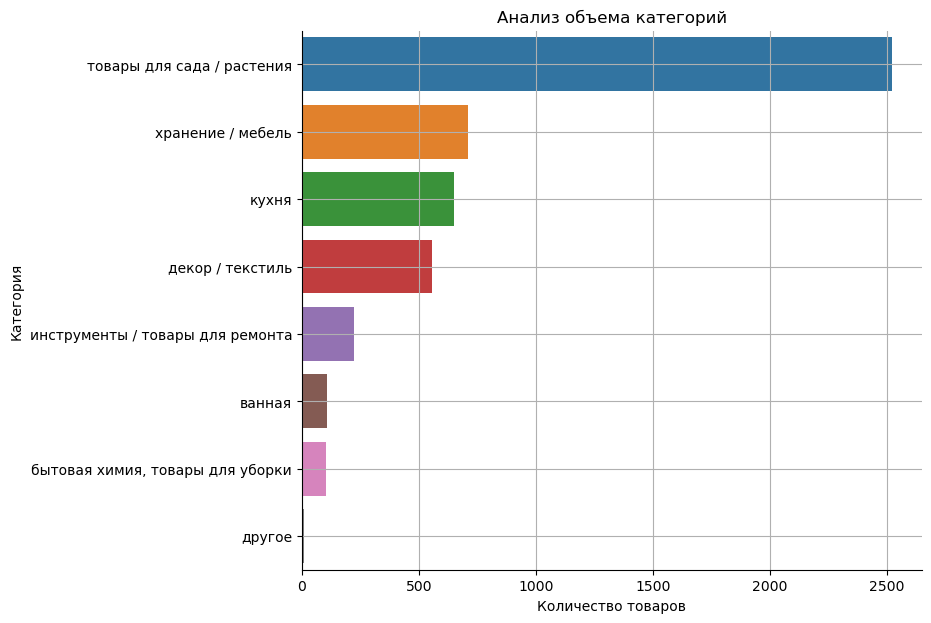

In [150]:
f, ax = plt.subplots(figsize = (8, 7))
ax = sns.barplot(x = 'product', y = category_count_pivot['category'] , \
                 data = category_count_pivot.sort_values('product', ascending = False), \
                 orient = 'h')
plt.title('Анализ объема категорий')
#plt.xticks(rotation=45)
ax.set_xlabel('Количество товаров') 
ax.set_ylabel('Категория')
plt.grid()
sns.despine()
plt.show()

Теперь проанализируем сумму стоимостей товаров в каждой из категорий

In [151]:
category_profit_pivot = (
    df
    .pivot_table(
        index='category', 
        values='total_cost', 
        aggfunc='sum'
    )
    .sort_values(
        by='total_cost', 
        ascending=False
    )
    .rename_axis(
        None, 
        axis=1
    ).reset_index())

display(category_profit_pivot)

,category,total_cost
0,хранение / мебель,1258445.000
1,кухня,636384.000
2,товары для сада / растения,576075.000
3,декор / текстиль,543665.000
4,инструменты / товары для ремонта,274342.000
5,"бытовая химия, товары для уборки",111814.000
6,ванная,65653.000
7,другое,776.000


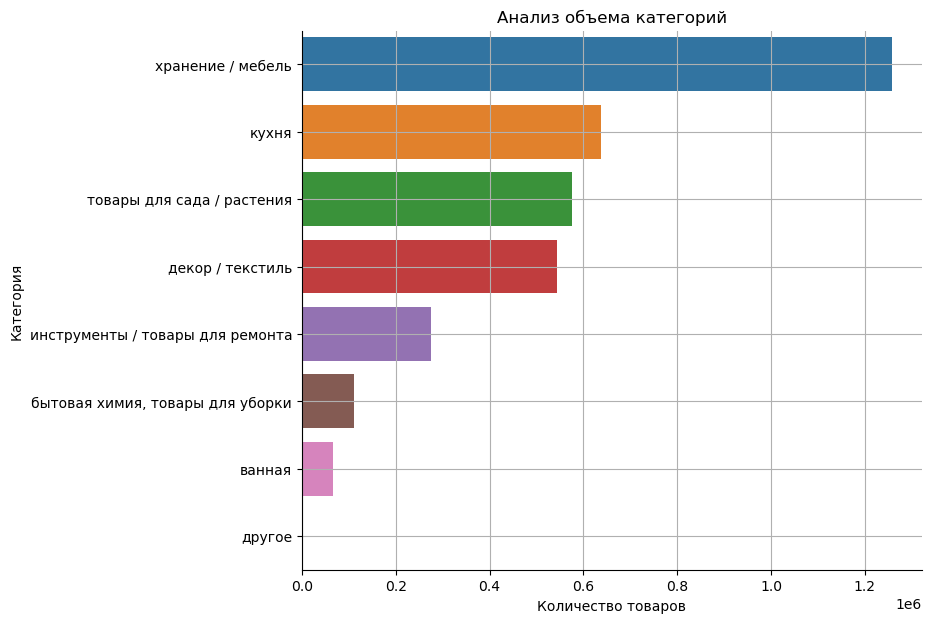

In [152]:
f, ax = plt.subplots(figsize = (8, 7))
ax = sns.barplot(x = 'total_cost', y = category_profit_pivot['category'] , \
                 data = category_profit_pivot.sort_values('total_cost', ascending = False), \
                 orient = 'h')
plt.title('Анализ объема категорий')
#plt.xticks(rotation=45)
ax.set_xlabel('Количество товаров') 
ax.set_ylabel('Категория')
plt.grid()
sns.despine()
plt.show()

Также посмотрим на среднее количество едениц в заказе для товаров из каждой категории

In [153]:
category_quantity_pivot = (
    df
    .pivot_table(
        index='category', 
        values='quantity', 
        aggfunc='mean'
    )
    .sort_values(
        by='quantity', 
        ascending=False
    )
    .rename_axis(
        None, 
        axis=1
    ).reset_index())

display(category_quantity_pivot)

,category,quantity
0,декор / текстиль,5.724
1,"бытовая химия, товары для уборки",5.078
2,инструменты / товары для ремонта,3.824
3,хранение / мебель,3.356
4,кухня,2.451
5,ванная,2.283
6,товары для сада / растения,1.613
7,другое,1.000


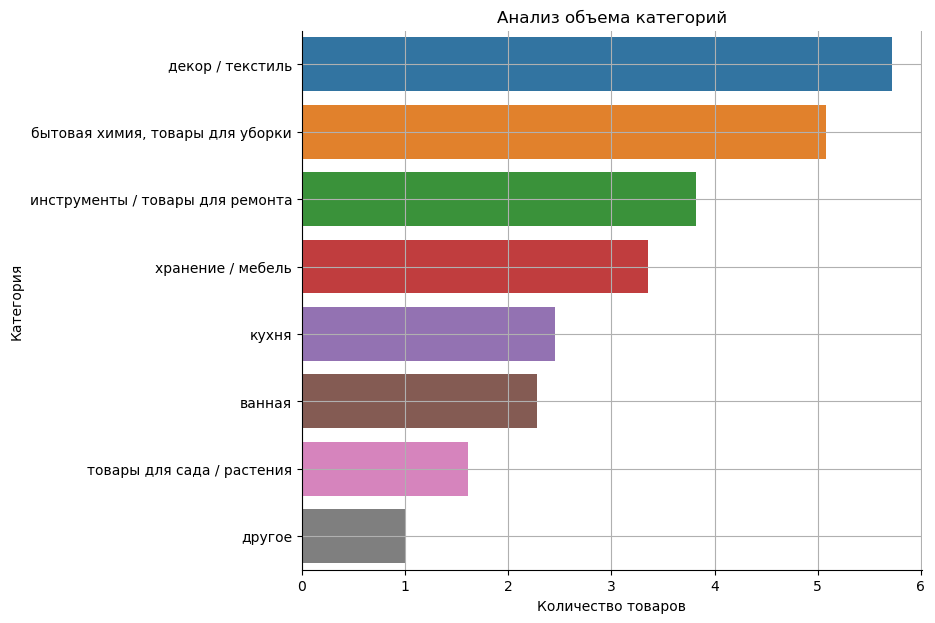

In [154]:
f, ax = plt.subplots(figsize = (8, 7))
ax = sns.barplot(x = 'quantity', y = category_quantity_pivot['category'] , \
                 data = category_quantity_pivot.sort_values('quantity', ascending = False), \
                 orient = 'h')
plt.title('Анализ объема категорий')
#plt.xticks(rotation=45)
ax.set_xlabel('Количество товаров') 
ax.set_ylabel('Категория')
plt.grid()
sns.despine()
plt.show()

## Выделение первичного и вторичного товарного ассортимента

Проведем ABC  анализ, разделим товары в датасете на группы относительно их количества и суммарной стоимости.

Далее проанализируем полученные группы и определим первичный и вторичный товарные ассортименты.

Для успешного определения групп, нам нужно рассчитать кумулятивную сумму продаж и процент который составляет от этой суммы каждый товар из датасета.

У нас уже обозначен столбец 'total_cost'. отсортируем значения по убыванию этого столбца

In [155]:
df = df.sort_values(by=['total_cost'], ascending=False)

добавим 'сквозной' столбец с накопленной суммой `run_cum_cost`

In [156]:
df['run_cum_cost'] = df['total_cost'].cumsum()

Теперь добавим столбец, который будет содержать полную сумму стоимости `total_cost_sum`

In [157]:
df['total_cost_sum'] = df['total_cost'].sum()

Теперь посчитаем процент

In [158]:
df['run_perc_cost'] = df['run_cum_cost'] / df['total_cost_sum']

Определим функцию для определения группы

In [159]:
# создадим 3 группы A,B,C на основе on the 'run_perc_cost' (A-80%,B-15%,C-5%)
def ABC_segmentation_cost(run_perc_cost):
    if run_perc_cost > 0 and run_perc_cost < 0.8:
        return 'A'
    elif run_perc_cost >=0.8 and run_perc_cost < 0.95:
        return 'B'
    elif run_perc_cost >=0.95:
        return 'C'

Применим функцию к столбцу `run_perc`

In [160]:
df['abc_cost'] = df['run_perc_cost'].apply(ABC_segmentation_cost)

In [161]:
df.sample(3)

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost,prodct_name_split,category,run_cum_cost,total_cost_sum,run_perc_cost,abc_cost
1731,2019-02-07 14:00:00,4b7b0e7e-ea25-4717-bbc7-7d01abf62854,70142,"муляж перец чили в связке, красный, 60 см, полиуретан, fancy fair/ff rp60",1,187.000,2019-02,2019-02-07,4,14,1,Зима,187.000,муляж перец,декор / текстиль,3236016.000,3467154.000,0.933,B
4169,2019-05-31 13:00:00,e0535076-6270-4df2-8621-cb06264a94fa,71565,окномойка с пластмассовой ручкой 42 см щетка 21 см разборная 57575 1804050,1,217.000,2019-05,2019-05-31,5,13,2,Весна,217.000,окномойка с,"бытовая химия, товары для уборки",3165683.000,3467154.000,0.913,B
3074,2019-04-24 10:00:00,fab08789-42e0-4c9a-922f-bdeceed62ed4,71265,сушилка для белья потолочная лиана люкс 300 см 300-ldn,1,787.000,2019-04,2019-04-24,3,10,2,Весна,787.000,сушилка для,кухня,2607996.000,3467154.000,0.752,A


Теперь мы можем провести ABC не относительно стоимости, а относительно количества товаров

In [162]:
df = df.sort_values(by=['quantity'], ascending=False)

In [163]:
df['run_cum_quant'] = df['quantity'].cumsum()

In [164]:
df['total_quant_sum'] = df['quantity'].sum()

In [165]:
df['run_perc_quant'] = df['run_cum_quant'] / df['total_quant_sum']

In [166]:
# создадим 3 группы A,B,C на основе on the 'run_perc_quant' (A-80%,B-15%,C-5%)
def ABC_segmentation_quant(run_perc_quant):
    if run_perc_quant > 0 and run_perc_quant < 0.8:
        return 'A'
    elif run_perc_quant >=0.8 and run_perc_quant < 0.95:
        return 'B'
    elif run_perc_quant >=0.95:
        return 'C'

In [167]:
df['abc_quant'] = df['run_perc_quant'].apply(ABC_segmentation_quant)

In [168]:
df.sample(5)

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost,prodct_name_split,category,run_cum_cost,total_cost_sum,run_perc_cost,abc_cost,run_cum_quant,total_quant_sum,run_perc_quant,abc_quant
4428,2019-06-03 21:00:00,dd1d60fe-b537-491e-af72-bfd11493e920,14842,пеларгония розебудная red pandora укорененный черенок,1,135.000,2019-06,2019-06-03,1,21,3,Лето,135.000,пеларгония розебудная,товары для сада / растения,3320076.000,3467154.000,0.958,C,9862,12827,0.769,A
1948,2019-02-22 10:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,70399,"форма аlpenkok ak-6062s для выпечки love розовый 21,5*24,5*4 см",1,194.000,2019-02,2019-02-22,5,10,1,Зима,194.000,форма аlpenkok,кухня,3188304.000,3467154.000,0.920,B,12681,12827,0.989,C
388,2018-10-23 21:00:00,aad8e182-8789-4c16-a85e-5750edd1099f,68733,сушилка для белья настенная zalger prima 510-720 веревочная 7 линий 25 м,1,299.000,2018-10,2018-10-23,2,21,4,Осень,299.000,сушилка для,кухня,3095217.000,3467154.000,0.893,B,12488,12827,0.974,C
2237,2019-03-07 10:00:00,0184f535-b60a-4914-a982-231e3f615206,14566,пеларгония розебудная margaretha укорененный черенок,1,135.000,2019-03,2019-03-07,4,10,2,Весна,135.000,пеларгония розебудная,товары для сада / растения,3332766.000,3467154.000,0.961,C,9744,12827,0.760,A
3901,2019-05-18 15:00:00,2459fe55-74d9-4e11-b82a-5265594f255e,14791,декабрист в горшке d12 цвет фуксии,1,139.000,2019-05,2019-05-18,6,15,2,Весна,139.000,декабрист в,товары для сада / растения,3312918.000,3467154.000,0.956,C,9536,12827,0.743,A


Теперь обозначим первичный и вторичный ассортимент

Для удобства объединим значения из `abc_cost` и `abc_quant` в один столбец

In [169]:
df['abc_cost_and_quant'] = df['abc_cost'] + df['abc_quant']

In [170]:
df.sample(3)

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost,prodct_name_split,category,run_cum_cost,total_cost_sum,run_perc_cost,abc_cost,run_cum_quant,total_quant_sum,run_perc_quant,abc_quant,abc_cost_and_quant
3757,2019-05-14 11:00:00,daef5362-af6c-4a0e-b838-831dc927475d,14770,рассада капусты кольраби сорт гулливер кассета 6 шт e6,1,120.000,2019-05,2019-05-14,2,11,2,Весна,120.000,рассада капусты,товары для сада / растения,3374811.000,3467154.000,0.973,C,9385,12827,0.732,A,CA
1801,2019-02-12 16:00:00,b8435301-8737-46c2-8db0-02a0570f0971,70228,"сумка-тележка хозяйственная rolser jet joy серебро, jet016 plata joy",1,3329.000,2019-02,2019-02-12,2,16,1,Зима,3329.000,сумка-тележка хозяйственная,хранение / мебель,1171806.000,3467154.000,0.338,A,9299,12827,0.725,A,AA
3248,2019-04-28 13:00:00,b6da6f7a-d2a3-424a-878e-1876c8b88126,14700,дыня симпатия р-9,2,38.000,2019-04,2019-04-28,7,13,2,Весна,76.000,дыня симпатия,товары для сада / растения,3439721.000,3467154.000,0.992,C,8515,12827,0.664,A,CA


In [171]:
abc_total_cost_pivot = (
    df
    .pivot_table(
        index='abc_cost_and_quant', 
        values='total_cost', 
        aggfunc='sum'
    )
    .sort_values(
        by='total_cost', 
        ascending=False
    )
    .rename_axis(
        None, 
        axis=1
    ).reset_index())

abc_total_cost_pivot['cost_share'] = abc_total_cost_pivot['total_cost'] / df['total_cost'].sum()
display(abc_total_cost_pivot.sort_values(by='cost_share', ascending=False))

,abc_cost_and_quant,total_cost,cost_share
0,AA,1353844.000,0.390
1,AB,955477.000,0.276
2,AC,463844.000,0.134
3,BB,250734.000,0.072
4,BA,184251.000,0.053
5,CA,132365.000,0.038
6,BC,85615.000,0.025
7,CB,41015.000,0.012
8,CC,9.000,0.000


Большую часть от всего объема выручки составляют товары групп 
- AA - 39%
- AB - 27%

Эти товары можно считать основным товарным ассортиментом

Что касается дополнительного товарного ассортимента - то это товары:
- AC - 13%
- BB - 7%
- BA - 5%

# Сформулируйте и проверьте статистические гипотезы:

### Анализ разницы в средних чеках между категориями

Посмотрим на ТОП 4 категории по выручке

In [172]:
category_profit_pivot.head(4)

,category,total_cost
0,хранение / мебель,1258445.000
1,кухня,636384.000
2,товары для сада / растения,576075.000
3,декор / текстиль,543665.000


Сформулируем гипотезы:
- **H0** - средние чеки ТОП 4 между категориями не отличаются
- **H1** - между чеками категорий ТОП 4 есть различия

Теперь выберем значения из датасета и создадим новые датафреймы под каждую категорию

In [173]:
# Хранение / Мебель
storage_df = df[df['category'] == 'хранение / мебель']['total_cost']

# Кухня
kitchen_df = df[df['category'] == 'кухня']['total_cost']

# Товары для сада/растения
garden_df = df[df['category'] == 'товары для сада / растения']['total_cost']

# Декор / текстиль
decoration_df = df[df['category'] == 'декор / текстиль']['total_cost']

Составим план проверок:
- storage_df - kitchen_df
- storage_df - garden_df
- storage_df - decoration_df
- kitchen_df - garden_df
- kitchen_df - decoration_df
- garden_df - decoration_df

Получается 6 проверок.

In [174]:
# storage_df - kitchen_df
print ('p-value =', '{0:.30f}'.format(st.mannwhitneyu(storage_df, kitchen_df) [1]))
print('{0:.6f}'.format(storage_df.mean() / kitchen_df.mean () -1))

p-value = 0.000000000000000000000000000051
0.815495


In [175]:
# storage_df - garden_df
print ('p-value =', '{0:.30f}'.format(st.mannwhitneyu(storage_df, garden_df) [1]))
print('{0:.6f}'.format(storage_df.mean() / garden_df.mean () -1))

p-value = 0.000000000000000000000000000000
6.784652


In [176]:
# storage_df - decoration_df
print ('p-value =', '{0:.30f}'.format(st.mannwhitneyu(storage_df, decoration_df) [1]))
print('{0:.6f}'.format(storage_df.mean() / decoration_df.mean () -1))

p-value = 0.000000000000000000000000000000
0.814523


In [177]:
# kitchen_df - garden_df
print ('p-value =', '{0:.30f}'.format(st.mannwhitneyu(kitchen_df, garden_df) [1]))
print('{0:.6f}'.format(kitchen_df.mean() / garden_df.mean () -1))

p-value = 0.000000000000000000000000000000
3.287895


In [178]:
# kitchen_df - decoration_df
print ('p-value =', '{0:.30f}'.format(st.mannwhitneyu(kitchen_df, decoration_df) [1]))
print('{0:.6f}'.format(kitchen_df.mean() / decoration_df.mean () -1))

p-value = 0.000000765100102069418626336296
-0.000535


In [179]:
# garden_df - decoration_df
print ('p-value =', '{0:.30f}'.format(st.mannwhitneyu(garden_df, decoration_df) [1]))
print('{0:.6f}'.format(garden_df.mean() / decoration_df.mean () -1))

p-value = 0.000000000000000000000000000000
-0.766910


В рамках проверки мы видим, что между средними чеками ТОП 4 категорий есть статистически значимые различия

### Анализ разницы в динамике продаж между разными временами года

Сформулируем гипотезы:
- **H0** - средний чек в октябре 2018 не отличается от среднего чека в октябре 2019 года
- **H1** - между средними чеками в октябре 2018 и 2019 года есть различия

Сначала создадим датасеты с данными за соответствующие периоды

In [180]:
# данные за октябрь 2018
october_2018 = df[df['mon_year'] == '2018-10']

# данные за октябрь 2019
october_2019 = df[df['mon_year'] == '2019-10']

In [181]:
df.head(3)

,date,customer_id,order_id,product,quantity,price,mon_year,day,weekday,hour,season,season_name,total_cost,prodct_name_split,category,run_cum_cost,total_cost_sum,run_perc_cost,abc_cost,run_cum_quant,total_quant_sum,run_perc_quant,abc_quant,abc_cost_and_quant
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.000,2019-06,2019-06-11,2,7,3,Лето,49432.000,вешалки мягкие,хранение / мебель,49432.000,3467154.000,0.014,A,334,12827,0.026,A,AA
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,муляж яблоко 9 см красное,300,51.000,2019-05,2019-05-20,1,21,2,Весна,15300.000,муляж яблоко,декор / текстиль,230669.000,3467154.000,0.067,A,634,12827,0.049,A,AA
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200,29.000,2018-12,2018-12-10,1,14,1,Зима,5800.000,ручка-скоба рс-100,декор / текстиль,622110.000,3467154.000,0.179,A,834,12827,0.065,A,AA


In [182]:
alpha = 0.05 #зададим критический уровень статистической значимости в 5%

results = st.ttest_ind(
    october_2018['total_cost'], 
    october_2019['total_cost'],
    equal_var=False) #предполагаем, что дисперсии не равны

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
print('Отношение среднего чека в 2019 году к 2018 году:', october_2019['total_cost'].mean() / october_2018['total_cost'].mean())

p-значение: 0.00825464952447862
Отвергаем нулевую гипотезу
Отношение среднего чека в 2019 году к 2018 году: 1.3692410717819223


Так мы видим, что средний чек в 2019 году вырос

# Общий вывод

В рамках исследования мы проанализировали данные о заказах интернет магазина товаров для дома.

Изучив прибыль и количество заказов в разрезе месяцев мы видим, что число заказов и выручка падают.

Также мы изучили наименования товаров и определили категорию для каждого товара. 

Посмотрим на ТОП 4 категории:

1) хранение / мебель
2) кухня
3) товары для сада / растения
4) декор / текстиль

Также мы провели ABC анализ на основе выручки и объема проданных товаров.
Большую часть от всего объема выручки составляют товары групп 
- AA - 39%
- AB - 27%

Эти товары можно считать основным товарным ассортиментом

Что касается дополнительного товарного ассортимента - то это товары:
- AC - 13%
- BB - 7%
- BA - 5%

Также мы проверили несколько гипотез, в результате этих проверок мы выяснили:
Между средними чеками ТОП 4 категорий есть статистически значимая разница.

Средние чеки в октябре 2018 и октябре 2019 также имеют статистически значимые отличия. Так средний чек в октябре 2019 года увеличился на 130%


## Презентация и дашборд

[Ссылка на презентацию](https://drive.google.com/file/d/1zMsC6WCnuRwSKENpM3JKZP4tWfmFdxi2/view?usp=share_link)

[Ссылка на дашборд](https://public.tableau.com/app/profile/roman2554/viz/Book1_16778396694480/Dashboard1?publish=yes)